# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [2]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

## Low-Rank vs Diffuse Coefficient Changes

In [3]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [4]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

X_lr = sample(W0 + DeltaW_lr)
S_lr = (X_lr.T @ X_lr) / n

X_dense = sample(W0 + DeltaW_dense)  
S_dense = (X_dense.T @ X_dense) / n

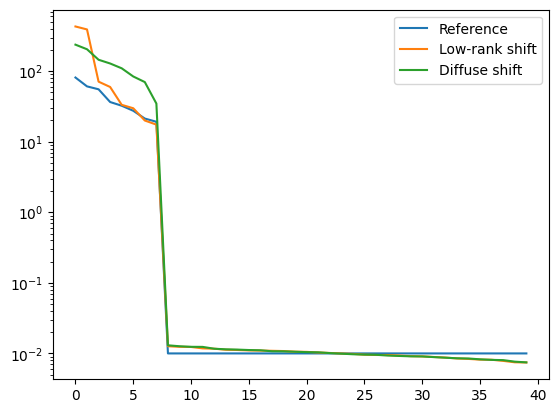

In [5]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)

plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

In [ ]:
threshold = 0.7
n_lr_significant = np.sum(np.abs(eig_lr - eig0) / eig0 > threshold)
n_dense_significant = np.sum(np.abs(eig_dense - eig0) / eig0 > threshold)

print(f'Number of significant eigenvalues changes in low-rank case: {n_lr_significant}')
print(f'Number of significant eigenvalues changes in dense case: {n_dense_significant}')

Number of significant eigenvalues changes in low-rank case: 3
Number of significant eigenvalues changes in dense case: 9


1. In low-rank case, 2 eigenvalues change significantly (when threshold=0.7), which matches the rank of the coefficient modification.
2. Because the modification to the coefficient matrix is dense and approximately full-rank, modification is spread across almost all available geometric directions rather than being concentrated in a few.
3. The rank of that change determines how many independent directions of variance are actually modified. A low-rank change creates a sharp modification in specific directions, while a diffuse change creates a broad modification across many directions.